In [1]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

# Load CSV
df = pd.read_csv("drowsiness_log.csv")

In [2]:
# Extract ground truth and predictions
y_true = df["label"]
y_pred = df["pred"]

<Axes: title={'center': 'Label Distribution'}, xlabel='label'>

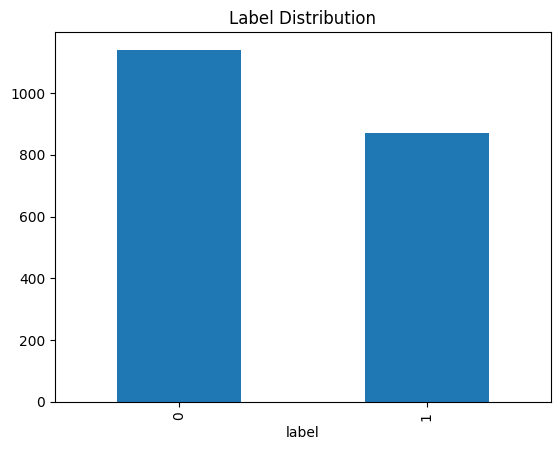

In [14]:
df['label'].value_counts().plot(kind='bar', title='Label Distribution')


In [3]:
# Basic metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, zero_division=0)
cm = confusion_matrix(y_true, y_pred)


In [4]:
# Confusion matrix breakdown
tn, fp, fn, tp = cm.ravel()

# Derived rates
tpr = tp / (tp + fn) if (tp + fn) else 0  # Sensitivity / Recall
fpr = fp / (fp + tn) if (fp + tn) else 0
tnr = tn / (tn + fp) if (tn + fp) else 0  # Specificity
fnr = fn / (fn + tp) if (fn + tp) else 0

In [6]:
# Display
print("=== Classification Metrics ===")
print(f"Accuracy       : {accuracy:.4f}")
print(f"Precision      : {precision:.4f}")
print(f"Recall (TPR)   : {recall:.4f}")
print(f"F1 Score       : {f1:.4f}")
print()

print("=== Rates ===")
print(f"True Positive Rate (Recall)     : {tpr:.4f}")
print(f"False Positive Rate             : {fpr:.4f}")
print(f"True Negative Rate (Specificity): {tnr:.4f}")
print(f"False Negative Rate             : {fnr:.4f}")

=== Classification Metrics ===
Accuracy       : 0.6967
Precision      : 0.6471
Recall (TPR)   : 0.6590
F1 Score       : 0.6530

=== Rates ===
True Positive Rate (Recall)     : 0.6590
False Positive Rate             : 0.2746
True Negative Rate (Specificity): 0.7254
False Negative Rate             : 0.3410


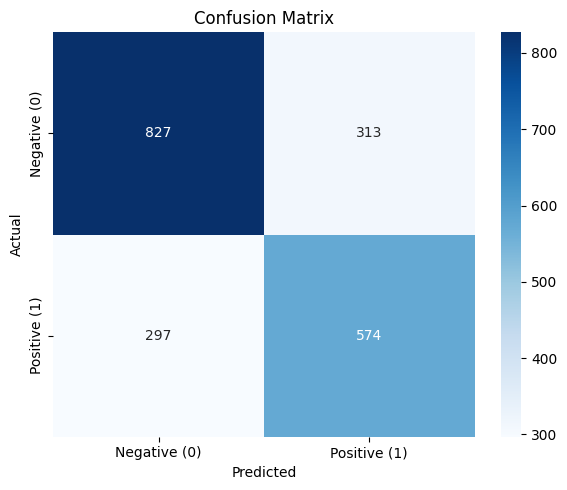

<Figure size 640x480 with 0 Axes>

In [7]:

import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix Plot
labels = ["Negative (0)", "Positive (1)"]
cm_labels = [[tn, fp], [fn, tp]]

plt.figure(figsize=(6, 5))
sns.heatmap(cm_labels, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()
plt.savefig("confusion_matrix.png")

In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, target_names=["Normal", "Anomaly"]))


              precision    recall  f1-score   support

      Normal       0.74      0.73      0.73      1140
     Anomaly       0.65      0.66      0.65       871

    accuracy                           0.70      2011
   macro avg       0.69      0.69      0.69      2011
weighted avg       0.70      0.70      0.70      2011



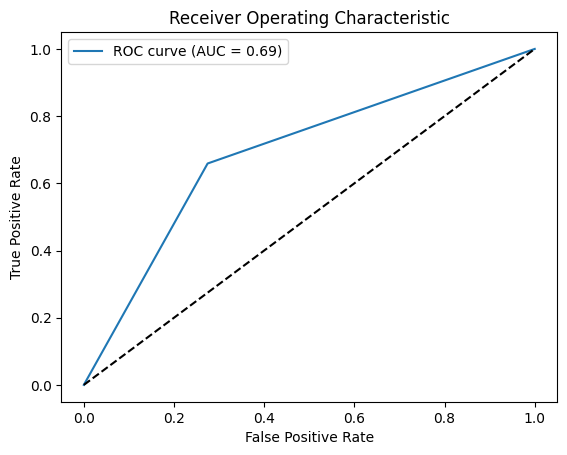

In [9]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()


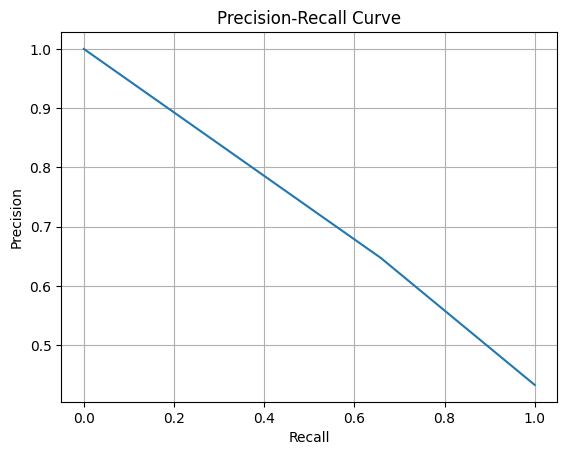

In [10]:
from sklearn.metrics import precision_recall_curve

precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred)
plt.plot(recall_vals, precision_vals)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()


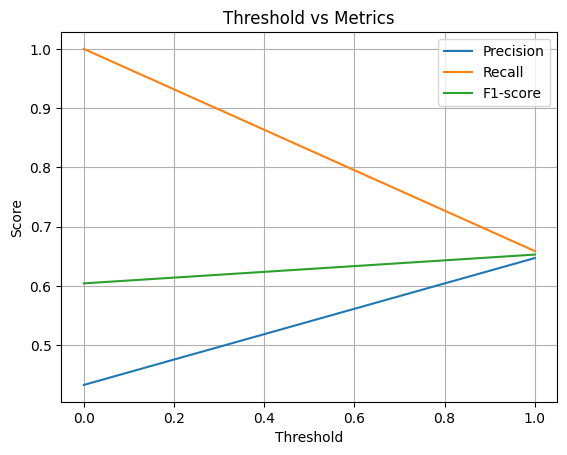

In [16]:
from sklearn.metrics import precision_recall_curve, f1_score

precisions, recalls, thresholds = precision_recall_curve(y_true, y_pred)
f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)

plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.plot(thresholds, f1s[:-1], label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Threshold vs Metrics')
plt.grid(True)
plt.show()


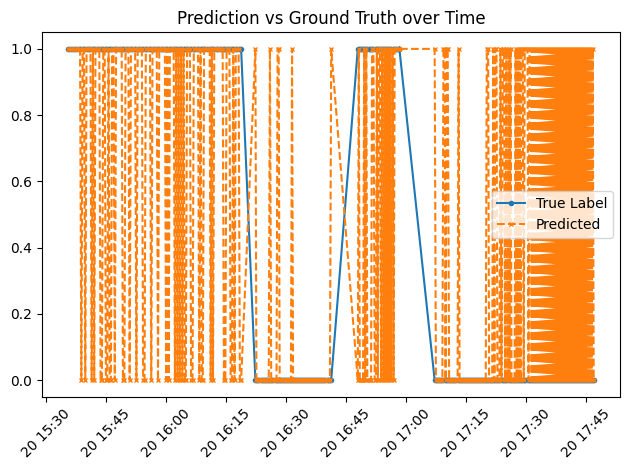

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.sort_values('timestamp', inplace=True)
# Optionally sample or plot every nth point
step = 5  # Plot every 5th timestamp
plt.plot(df['timestamp'][::step], df['label'][::step], label='True Label', marker='o', markersize=3)
plt.plot(df['timestamp'][::step], df['pred'][::step], label='Predicted', linestyle='--', marker='x', markersize=3)

plt.xticks(rotation=45)
plt.title("Prediction vs Ground Truth over Time")
plt.legend()
plt.tight_layout()
plt.show()


In [23]:
import plotly.express as px

fig = px.line(df, x='timestamp', y=['label', 'pred'], markers=True, title="Interactive Prediction vs Ground Truth")
fig.show()
